In [ ]:
# https://krassowski.github.io/complex-upset/articles/Examples_Python.html

In [1]:
!pip install pandas pydataset rpy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=13fe1ab657f7ce7ad96b3368d452d2b45fd27b443fb5c28f7981d06101159e7f
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset


In [5]:
%%capture
%load_ext rpy2.ipython

In [6]:
%%R
if (!require(devtools, quietly=T)) install.packages("devtools")
if (!require(ComplexUpset, quietly=T)) devtools::install_github("krassowski/complex-upset")



(as ‘lib’ is unspecified)







	‘/tmp/Rtmp52ntdm/downloaded_packages’



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmp52ntdm/remotes4bd109b961f/krassowski-complex-upset-db1e099/DESCRIPTION’ ... OK
* preparing ‘ComplexUpset’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘ComplexUpset/vignettes’
* building ‘ComplexUpset_1.3.6.tar.gz’
Warning in utils::tar(filepath, pkgname, compression = compression, compression_level = 9L,  :
  storing paths of more than 100 bytes is not portable:
  ‘ComplexUpset/tests/testthat/_snaps/examples/example-3-6-showing-intersection-size-union-size-ratio-1.svg’
Warning in utils::tar(filepath, pkgname, compression = compression, compression_level = 9L,  :
  storing paths of more than 100 bytes is not portable:
  ‘ComplexUpset/tests/testthat/_snaps/examples/example-3-7-1-showing-percentages-and-numbers-together-1.svg’
Warning 

(as ‘lib’ is unspecified)



In [7]:
%%R
library(ggplot2)
library(ComplexUpset)

In [28]:
from pydataset import data as load_data
movies = load_data('movies').dropna()
movies

,title,year,length,budget,rating,votes,r1,r2,r3,r4,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
48,'Til There Was You,1997,113,23000000.0,4.8,799,4.5,4.5,4.5,14.5,...,4.5,14.5,PG-13,0,0,1,0,0,1,0
112,10 Things I Hate About You,1999,97,16000000.0,6.7,19095,4.5,4.5,4.5,4.5,...,14.5,14.5,PG-13,0,0,1,0,0,1,0
124,100 Mile Rule,2002,98,1100000.0,5.6,181,4.5,4.5,4.5,4.5,...,4.5,14.5,R,0,0,1,0,0,0,0
173,13 Going On 30,2004,98,37000000.0,6.4,7859,4.5,4.5,4.5,4.5,...,4.5,14.5,PG-13,0,0,1,1,0,1,0
186,"13th Warrior, The",1999,102,85000000.0,6.1,14344,4.5,4.5,4.5,4.5,...,4.5,4.5,R,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58281,Your Friends & Neighbors,1998,100,5000000.0,6.4,2659,4.5,4.5,4.5,4.5,...,14.5,4.5,R,0,0,1,1,0,0,0
58502,Zero Effect,1998,116,5000000.0,7.0,4820,4.5,4.5,4.5,4.5,...,14.5,14.5,R,0,0,1,0,0,0,0
58690,Zoolander,2001,89,28000000.0,6.1,18277,4.5,4.5,4.5,4.5,...,4.5,4.5,PG-13,0,0,1,0,0,0,0
58787,xXx,2002,132,85000000.0,5.5,18514,4.5,4.5,4.5,4.5,...,4.5,4.5,PG-13,1,0,0,0,0,0,0


In [29]:
movies.head(3).T

,48,112,124
title,'Til There Was You,10 Things I Hate About You,100 Mile Rule
year,1997,1999,2002
length,113,97,98
budget,23000000.0,16000000.0,1100000.0
rating,4.8,6.7,5.6
votes,799,19095,181
r1,4.5,4.5,4.5
r2,4.5,4.5,4.5
r3,4.5,4.5,4.5
r4,14.5,4.5,4.5


In [18]:
genres = list(movies.columns[-7:])
genres

['Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']

In [19]:
movies[genres] = movies[genres] == 1
movies[genres].head(3).T

,48,112,124
Action,False,False,False
Animation,False,False,False
Comedy,True,True,True
Drama,False,False,False
Documentary,False,False,False
Romance,True,True,False
Short,False,False,False


In [25]:
# **Before passing to R, assign .items to .iteritems**
pd.DataFrame.iteritems = pd.DataFrame.items


In [26]:
%R -i movies -i genres

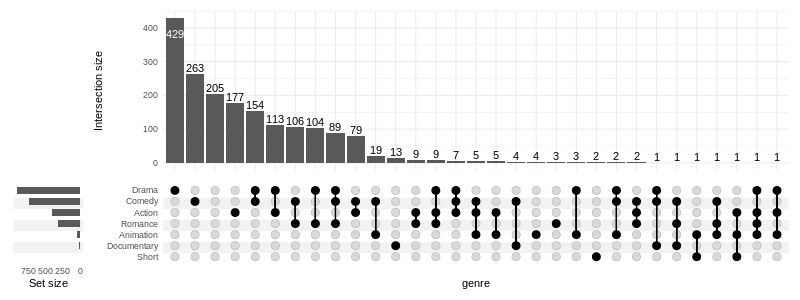

In [27]:
%%R -w 800 -h 300
upset(movies, genres, name='genre', width_ratio=0.1)

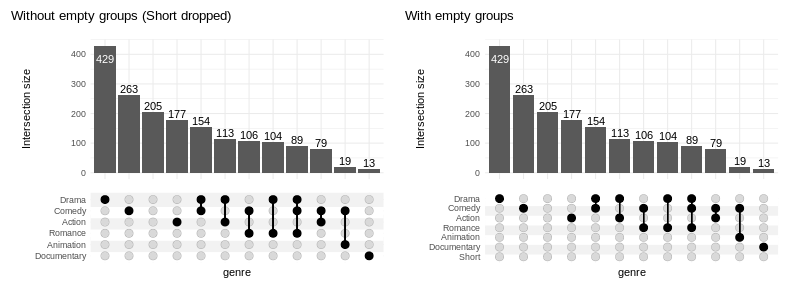

In [30]:
%%R -w 800 -h 300
(
    upset(movies, genres, name='genre', width_ratio=0.1, min_size=10, wrap=TRUE, set_sizes=FALSE)
    + ggtitle('Without empty groups (Short dropped)')
    +    # adding plots is possible thanks to patchwork
    upset(movies, genres, name='genre', width_ratio=0.1, min_size=10, keep_empty_groups=TRUE, wrap=TRUE, set_sizes=FALSE)
    + ggtitle('With empty groups')
)

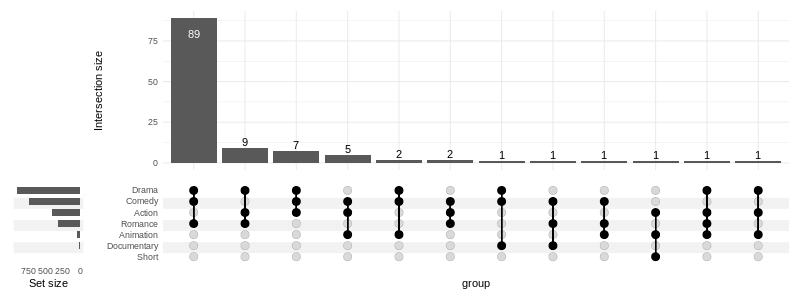

In [31]:
%%R -w 800 -h 300
upset(
    movies, genres, width_ratio=0.1,
    min_degree=3,
)

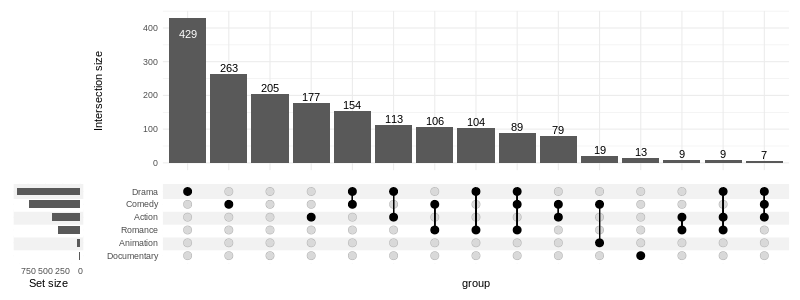

In [32]:
%%R -w 800 -h 300
upset(
    movies, genres, width_ratio=0.1,
    n_intersections=15
)

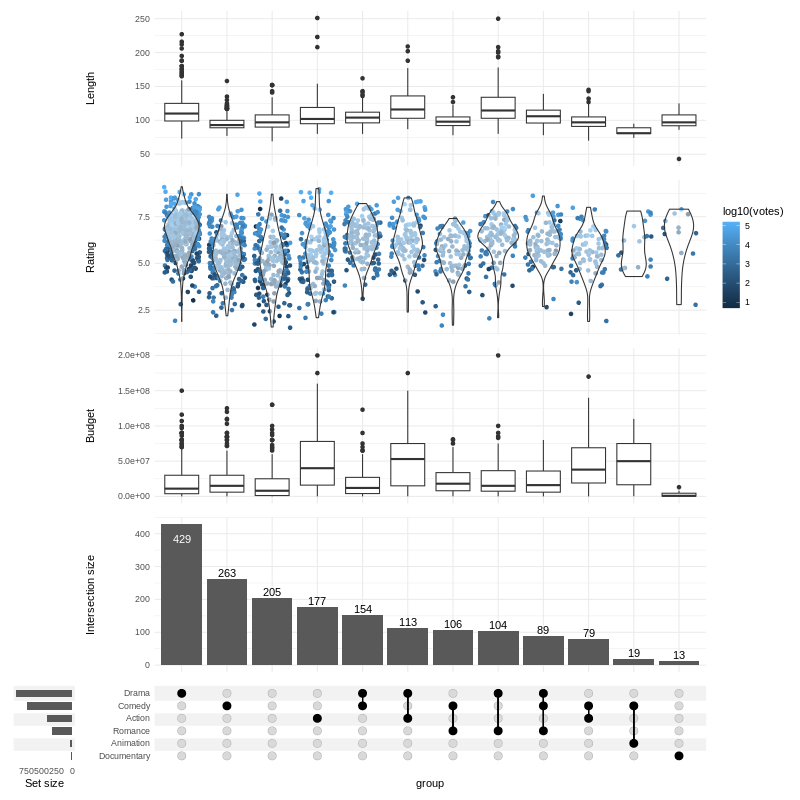

In [34]:
%%R -w 800 -h 800

set.seed(0)   # keep the same jitter for identical plots

upset(
    movies,
    genres,
    annotations = list(
        # 1st method - passing list:
        'Length'=list(
            aes=aes(x=intersection, y=length),
            # provide a list if you wish to add several geoms
            geom=geom_boxplot(na.rm=TRUE)
        ),
        # 2nd method - using ggplot
        'Rating'=(
            # note that aes(x=intersection) is supplied by default and can be skipped
            ggplot(mapping=aes(y=rating))
            # checkout ggbeeswarm::geom_quasirandom for better results!
            + geom_jitter(aes(color=log10(votes)), na.rm=TRUE)
            + geom_violin(alpha=0.5, na.rm=TRUE)
        ),
        # 3rd method - using `upset_annotate` shorthand
        'Budget'=upset_annotate('budget', geom_boxplot(na.rm=TRUE))
    ),
    min_size=10,
    width_ratio=0.1
)

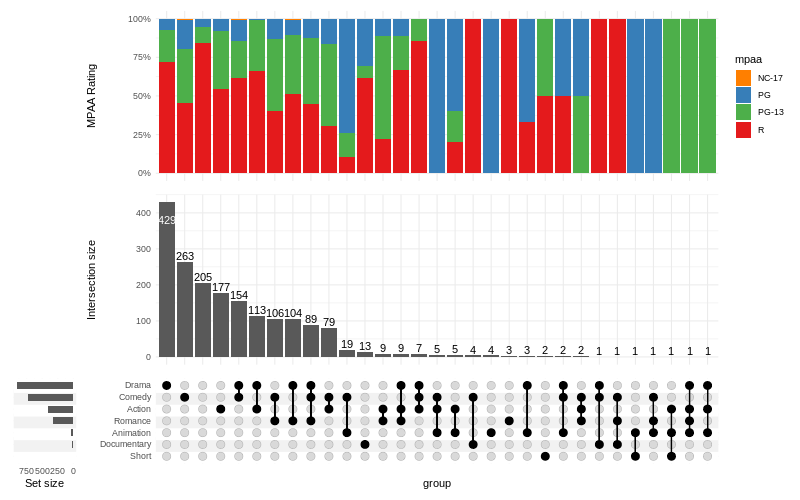

In [35]:
%%R -w 800 -h 500

upset(
    movies,
    genres,
    annotations = list(
        'MPAA Rating'=(
            ggplot(mapping=aes(fill=mpaa))
            + geom_bar(stat='count', position='fill')
            + scale_y_continuous(labels=scales::percent_format())
            + scale_fill_manual(values=c(
                'R'='#E41A1C', 'PG'='#377EB8',
                'PG-13'='#4DAF4A', 'NC-17'='#FF7F00'
            ))
            + ylab('MPAA Rating')
        )
    ),
    width_ratio=0.1
)

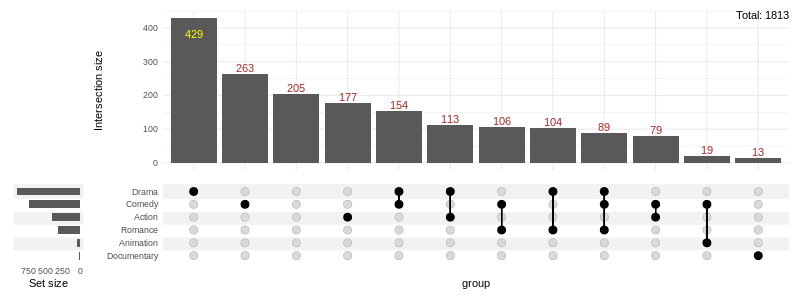

In [36]:
%%R -w 800 -h 300

upset(
    movies,
    genres,
    base_annotations=list(
        'Intersection size'=intersection_size(
            text_colors=c(
                on_background='brown', on_bar='yellow'
            )
        )
        + annotate(
            geom='text', x=Inf, y=Inf,
            label=paste('Total:', nrow(movies)),
            vjust=1, hjust=1
        )
        + ylab('Intersection size')
    ),
    min_size=10,
    width_ratio=0.1
)

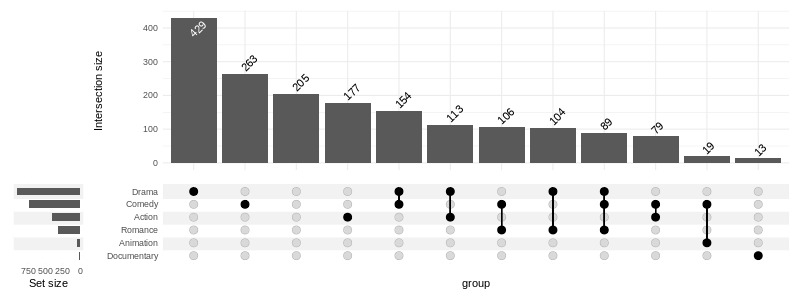

In [37]:
%%R -w 800 -h 300

upset(
    movies,
    genres,
    base_annotations=list(
        'Intersection size'=intersection_size(
            text=list(
                vjust=-0.1,
                hjust=-0.1,
                angle=45
            )
        )
    ),
    min_size=10,
    width_ratio=0.1
)

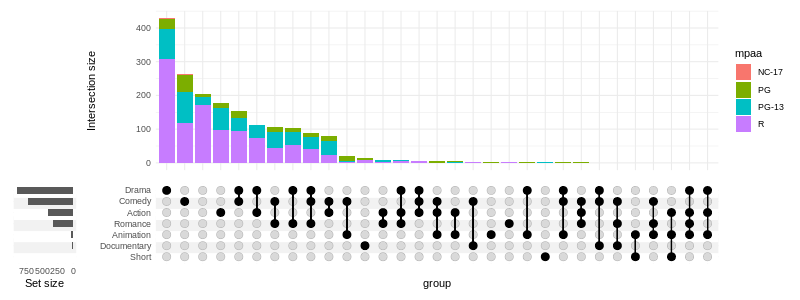

In [38]:
%%R -w 800 -h 300

upset(
    movies,
    genres,
    base_annotations=list(
        'Intersection size'=intersection_size(
            counts=FALSE,
            mapping=aes(fill=mpaa)
        )
    ),
    width_ratio=0.1
)

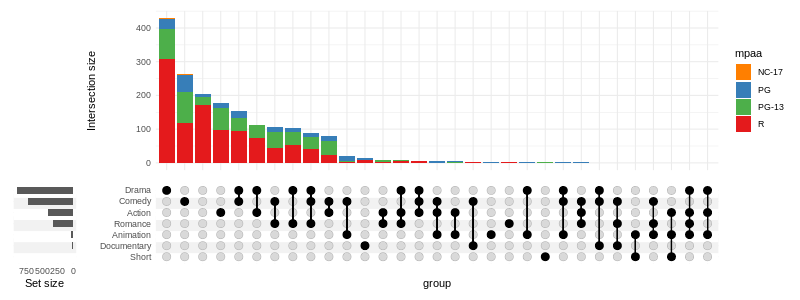

In [39]:
%%R -w 800 -h 300
upset(
    movies,
    genres,
    base_annotations=list(
        'Intersection size'=intersection_size(
            counts=FALSE,
            mapping=aes(fill=mpaa)
        ) + scale_fill_manual(values=c(
            'R'='#E41A1C', 'PG'='#377EB8',
            'PG-13'='#4DAF4A', 'NC-17'='#FF7F00'
        ))
    ),
    width_ratio=0.1
)

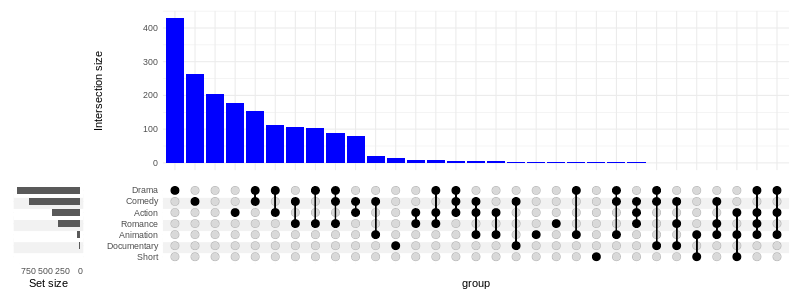

In [40]:
%%R -w 800 -h 300

upset(
    movies,
    genres,
    base_annotations=list(
        'Intersection size'=intersection_size(
            counts=FALSE,
            mapping=aes(fill='bars_color')
        ) + scale_fill_manual(values=c('bars_color'='blue'), guide='none')
    ),
    width_ratio=0.1
)

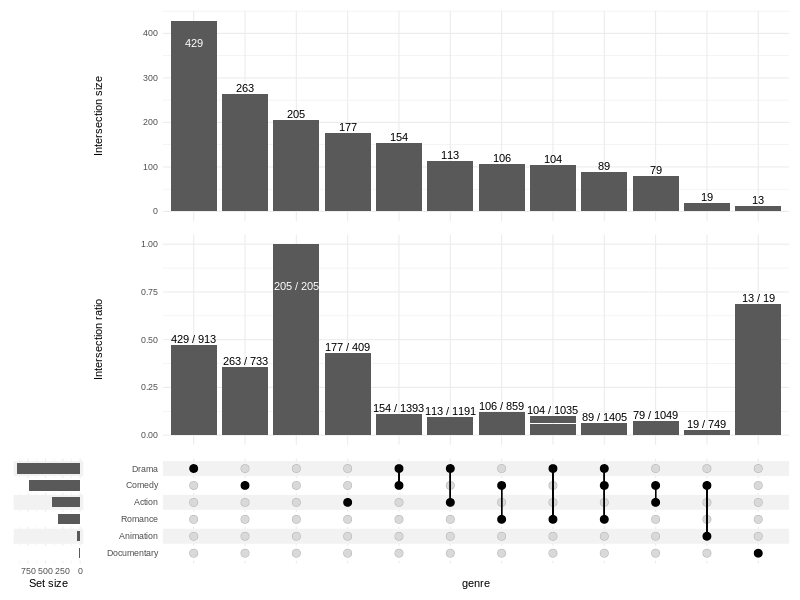

In [41]:
%%R -w 800 -h 600
upset(
    movies, genres, name='genre', width_ratio=0.1, min_size=10,
    base_annotations=list(
        'Intersection size'=intersection_size(),
        'Intersection ratio'=intersection_ratio()
    )
)

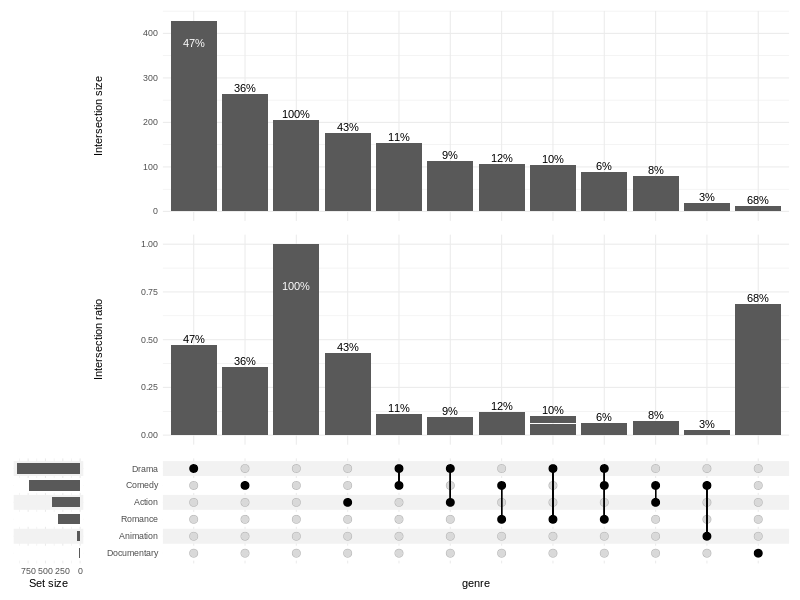

In [42]:
%%R -w 800 -h 600
upset(
    movies, genres, name='genre', width_ratio=0.1, min_size=10,
    base_annotations=list(
        # with manual aes specification:
        'Intersection size'=intersection_size(text_mapping=aes(label=paste0(round(
            !!get_size_mode('exclusive_intersection')/!!get_size_mode('inclusive_union') * 100
        ), '%'))),
        # using shorthand:
        'Intersection ratio'=intersection_ratio(text_mapping=aes(label=!!upset_text_percentage()))
    )
)

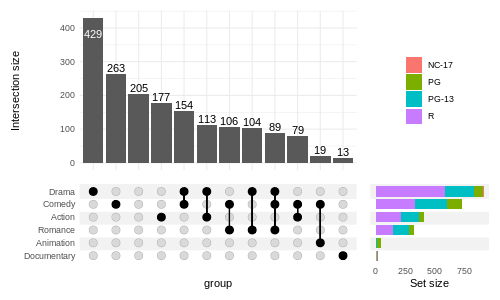

In [43]:
%%R -w 500 -h 300

upset(
    movies, genres,
    min_size=10,
    width_ratio=0.3,
    set_sizes=(
        upset_set_size(
            geom=geom_bar(
                aes(fill=mpaa, x=group),
                width=0.8
            ),
            position='right'
        )
    ),
    # moves legends over the set sizes
    guides='over'
)

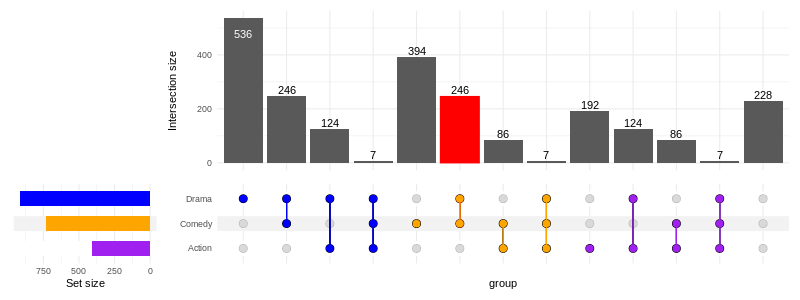

In [44]:
%%R -w 800 -h 300

upset(
    movies, c("Action", "Comedy", "Drama"),
    width_ratio=0.2,
    group_by='sets',
    queries=list(
        upset_query(
            intersect=c('Drama', 'Comedy'),
            color='red',
            fill='red',
            only_components=c('intersections_matrix', 'Intersection size')
        ),
        upset_query(group='Drama', color='blue'),
        upset_query(group='Comedy', color='orange'),
        upset_query(group='Action', color='purple'),
        upset_query(set='Drama', fill='blue'),
        upset_query(set='Comedy', fill='orange'),
        upset_query(set='Action', fill='purple')
    )
)